## Exercise 1
Load a dataset of your choosing from those found in Canvas. It can be the same one we are working with.
Inspect it and write down at least 5 issues you identified in this step.
Proceed to cleaning and preparing it for analysis.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [4]:
df = pd.read_csv('../Datasets/airlines.csv')
                 

In [4]:
df.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [5]:
df.shape


(25976, 25)

In [6]:
df.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [5]:
#df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns = df.columns.str.replace(' ', '')

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Unnamed:0                        25976 non-null  int64   
 1   id                               25976 non-null  int64   
 2   Gender                           25976 non-null  object  
 3   CustomerType                     25976 non-null  object  
 4   Age                              25976 non-null  int64   
 5   TypeofTravel                     25976 non-null  object  
 6   Class                            25976 non-null  object  
 7   FlightDistance                   25976 non-null  int64   
 8   Inflightwifiservice              25976 non-null  int64   
 9   Departure/Arrivaltimeconvenient  25976 non-null  int64   
 10  EaseofOnlinebooking              25976 non-null  int64   
 11  Gatelocation                     25976 non-null  int64   
 12  Food

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed:0,25976.0,12987.500000,7498.769632,0.0,6493.75,12987.5,19481.25,25975.0
id,25976.0,65005.657992,37611.526647,17.0,32170.50,65319.5,97584.25,129877.0
Age,25976.0,39.620958,15.135685,7.0,27.00,40.0,51.00,85.0
FlightDistance,25976.0,1193.788459,998.683999,31.0,414.00,849.0,1744.00,4983.0
Inflightwifiservice,25976.0,2.724746,1.335384,0.0,2.00,3.0,4.00,5.0
Departure/Arrivaltimeconvenient,25976.0,3.046812,1.533371,0.0,2.00,3.0,4.00,5.0
EaseofOnlinebooking,25976.0,2.756775,1.412951,0.0,2.00,3.0,4.00,5.0
Gatelocation,25976.0,2.977094,1.282133,1.0,2.00,3.0,4.00,5.0
Foodanddrink,25976.0,3.215353,1.331506,0.0,2.00,3.0,4.00,5.0
Onlineboarding,25976.0,3.261665,1.355536,0.0,2.00,4.0,4.00,5.0


In [6]:
df['ArrivalDelayinMinutes'].median()

0.0

In [7]:
df['ArrivalDelayinMinutes'] = df['ArrivalDelayinMinutes'].fillna(df['ArrivalDelayinMinutes'].median())

In [11]:
df.isna().sum()

Unnamed:0                          0
id                                 0
Gender                             0
CustomerType                       0
Age                                0
TypeofTravel                       0
Class                              0
FlightDistance                     0
Inflightwifiservice                0
Departure/Arrivaltimeconvenient    0
EaseofOnlinebooking                0
Gatelocation                       0
Foodanddrink                       0
Onlineboarding                     0
Seatcomfort                        0
Inflightentertainment              0
On-boardservice                    0
Legroomservice                     0
Baggagehandling                    0
Checkinservice                     0
Inflightservice                    0
Cleanliness                        0
DepartureDelayinMinutes            0
ArrivalDelayinMinutes              0
satisfaction                       0
dtype: int64

## Exercise 2
Create a function from scratch that takes in an array and calculates the average. You can benchmark your function against np.mean() for validation.
Test is with at least 2 columns with quantitative data.

In [12]:
np.mean(df)

Unnamed:0                          12987.500000
id                                 65005.657992
Age                                   39.620958
FlightDistance                      1193.788459
Inflightwifiservice                    2.724746
Departure/Arrivaltimeconvenient        3.046812
EaseofOnlinebooking                    2.756775
Gatelocation                           2.977094
Foodanddrink                           3.215353
Onlineboarding                         3.261665
Seatcomfort                            3.449222
Inflightentertainment                  3.357753
On-boardservice                        3.385664
Legroomservice                         3.350169
Baggagehandling                        3.633238
Checkinservice                         3.314175
Inflightservice                        3.649253
Cleanliness                            3.286226
DepartureDelayinMinutes               14.306090
ArrivalDelayinMinutes                 14.693756
dtype: float64

In [ ]:
#calculate mean manually

In [13]:
sum(df['Seatcomfort']) / len(df)

3.4492223591007085

In [14]:
sum(df['Cleanliness']) / len(df)

3.28622574684324

## Exercise 3
Create a function from scratch that takes in an array and calculates the median. You can benchmark your function against np.median() for validation.
Test is with at least 2 columns with quantitative data.

In [15]:
np.median(df['Seatcomfort'])

4.0

In [16]:
np.median(df['Cleanliness'])

3.0

In [ ]:
##calculate median manually


In [ ]:
#airlines DF is a even dataset
#get two middle numbers and divide by two.

In [17]:
one = sorted(df['Seatcomfort'])[len(df) // 2]
one

4

In [18]:
two = sorted(df['Seatcomfort'])[len(df) // 2 - 1]
two

4

In [19]:
median = (one + two) / 2
median

4.0

In [20]:
one = sorted(df['Cleanliness'])[len(df) // 2]
two = sorted(df['Cleanliness'])[len(df) // 2 - 1]
median = (one + two) / 2
median

3.0

## Exercise 4
​
1. Create a function from scratch that takes in an array and calculates the variance. You can benchmark your function against `np.var()` for validation.
2. Test is with at least 2 columns with quantitative data.

In [91]:
np.var(df['FlightDistance'])

1028184.3676841616

In [86]:
#manually create variance

In [94]:
sum([(x - df['FlightDistance'].mean()) ** 2 for x in df['FlightDistance']]) / (len(df['FlightDistance']))

1028184.3676841616

## Exercise 5
Create a function from scratch that takes in an array and calculates the minimum value. You can benchmark your function against np.min() for validation.
Test is with at least 2 columns with quantitative data.

In [21]:
np.min(df)

Unnamed:0                                                0
id                                                      17
Gender                                              Female
CustomerType                                Loyal Customer
Age                                                      7
TypeofTravel                               Business travel
Class                                             Business
FlightDistance                                          31
Inflightwifiservice                                      0
Departure/Arrivaltimeconvenient                          0
EaseofOnlinebooking                                      0
Gatelocation                                             1
Foodanddrink                                             0
Onlineboarding                                           0
Seatcomfort                                              1
Inflightentertainment                                    0
On-boardservice                                         

In [ ]:
#manually calculate the min value

In [22]:
sorted(df['FlightDistance'])[0]

31

In [23]:
sorted(df['Gatelocation'])[0]

1

## Exercise 6
Create a function from scratch that takes in an array and calculates the maximum value. You can benchmark your function against np.max() for validation.
Test is with at least 2 columns with quantitative data.

In [24]:
np.max(df)

Unnamed:0                                      25975
id                                            129877
Gender                                          Male
CustomerType                       disloyal Customer
Age                                               85
TypeofTravel                         Personal Travel
Class                                       Eco Plus
FlightDistance                                  4983
Inflightwifiservice                                5
Departure/Arrivaltimeconvenient                    5
EaseofOnlinebooking                                5
Gatelocation                                       5
Foodanddrink                                       5
Onlineboarding                                     5
Seatcomfort                                        5
Inflightentertainment                              5
On-boardservice                                    5
Legroomservice                                     5
Baggagehandling                               

In [ ]:
#manually calculate the max


In [25]:
sorted(df['FlightDistance'])[-1]

4983

In [26]:
sorted(df['Gatelocation'])[-1]

5

## Exercise 7
Create a function from scratch that takes in an array and a percentage value as a float, and calculates the percentile of the array chosen. You can benchmark your function against np.percentile() for validation.
Test is with at least 2 columns with quantitative data.

In [182]:
np.percentile(df['FlightDistance'], 25)

414.0

In [27]:
np.percentile(df['FlightDistance'], 75)

1744.0

In [ ]:
#calculate function from scratch

In [28]:
def calcpercentile(x ,colName):
    return sorted(df[colName])[int((x/100) *len(df))]

In [29]:
calcpercentile(75,'FlightDistance')

1744

In [30]:
calcpercentile(25,'FlightDistance')

414

## Exercise 8

1. Create a function from scratch that takes in an array and calculates the range of such array. You can benchmark your function against `np.ptp()` for validation.
2. Test is with at least 2 columns with quantitative data.

In [184]:
np.ptp(df['FlightDistance'])

4952

In [95]:
#calculate the range
sorted(df['FlightDistance'])[-1] - sorted(df['FlightDistance'])[0]

4952

## Exercise 9
Create a function from scratch that takes in an array and return the min and max value of an array as a tuple. You can benchmark your function against np.min() and np.max() for validation.
Test is with at least 2 columns with quantitative data.

In [31]:
def side_values(num_list):
    results_list = sorted(num_list)
    return results_list[0], results_list[-1]


somelist = side_values([1,12,2,53,23,6,17])
print(somelist)

(1, 53)


In [32]:
somelist = side_values(df["FlightDistance"])
print(somelist)

(31, 4983)


## Exercise 10
Create a function from scratch that takes two arrays and returns the correlation between both. You can benchmark your function against the examples provided in class.
Test is with at least 2 pairs of columns with quantitative data.


In [33]:
from scipy.stats import pearsonr

In [34]:
pearsonr(df['Seatcomfort'], df['Legroomservice'])[0]

0.09915045742678201

In [ ]:
#manually calculate correlation

In [35]:
# let's create some columns for our prices
seat = df['Seatcomfort']
legroom = df['Legroomservice']

mean_seat = seat.mean()
mean_legroom = legroom.mean()

In [36]:
# let's sum up the product of the differences between the elements in each array and their mean
arrays_diff_sum = sum((seat - mean_seat) * (legroom - mean_legroom))
arrays_diff_sum


4483.873421619813

In [37]:
# let's now compute the square root of the sum of the squared difference between each of the 
# elements in an array and its mean
diff_sqrt = np.sqrt(sum((seat - mean_seat)**2) * sum((legroom - mean_legroom)**2))
diff_sqrt

45222.92219308992

In [38]:
r_xy = arrays_diff_sum / diff_sqrt
print("The correlation between seat comfort and the leg room size is: %.3f" % r_xy)

The correlation between seat comfort and the leg room size is: 0.099


## Exercise 11
Create a function from scratch that takes two arrays and returns the covariance between both. You can benchmark your function against the example provided in class.
Test is with at least 2 pairs of columns with quantitative data.

In [39]:
# np.dot takes the products of two elements and sums them up
np.dot((seat - seat.mean()), (legroom - legroom.mean())) / len(seat)

0.1726160079157664

In [40]:
sum((seat - seat.mean()) * (legroom - legroom.mean())) / len(seat)

0.17261600791576118

## Exercise 12

1. Create a function from scratch that takes in an array and calculates the standard deviation. You can benchmark your function against `np.std()` for validation.
2. Test is with at least 2 pairs of columns with quantitative data.

In [101]:
np.std(df['FlightDistance'])

1013.9942641278409

In [102]:
#manually create standard deviation, sqrt of variance
import math

In [100]:
math.sqrt(sum([(x - df['FlightDistance'].mean()) ** 2 for x in df['FlightDistance']]) / (len(df['FlightDistance']-1)))

1013.9942641278409

In [103]:
#take in array and calculate stdev

In [107]:
somearray = np.random.randint(low=0, high=100, size=81, dtype='int8')
print(somearray)

y = np.std(somearray)
print(y)

x = np.sqrt(np.mean((somearray - np.mean(somearray)) ** 2 ))
x

[71 73  0 82 33 84 87 84 23 69 67 78 86 52 97 49 54 57 70 76 40 48 48 25
 49 46 56 72 51 43  0 65 35 85 38 45 60  0 85 86 74 81  6 86 36 13 17 52
 75 34 51 68 10 69 23 95 79 27 99 32 91 51 18 82  8 95 67 29 62 70 91 67
 82  8 80 28 38 61 96 39 94]
27.161026930795078


27.161026930795078

## Exercise 13
Create two pivot tables with different layers of complexity. Use both, categorical and quantitative variables.
Creat 2 visualisations, one with each.

In [8]:
#create age bins for analysis
df['Age_by_decade'] = pd.cut(x=df['Age'], bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 89], labels=['0s','10s','20s', '30s', '40s', '50s','60s','70s','80s'])

In [42]:
df.head()


,Unnamed:0,id,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Inflightwifiservice,Departure/Arrivaltimeconvenient,EaseofOnlinebooking,Gatelocation,Foodanddrink,Onlineboarding,Seatcomfort,Inflightentertainment,On-boardservice,Legroomservice,Baggagehandling,Checkinservice,Inflightservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes,satisfaction,Age_by_decade
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied,50s
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied,30s
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,20s
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied,40s
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied,40s


In [9]:
#create column to numerise customer satisfaction
df['Satisfaction_Score'] = np.where(df['satisfaction']=='satisfied', 1, 0)

In [113]:
sat_by_age = df[df['Age']>17].pivot_table(
    index='Age_by_decade',
    values=['Satisfaction_Score'],
    aggfunc={'mean','count'}, 
    columns='CustomerType',
    fill_value=0
)
sat_by_age

Satisfaction_Score                                   \
                           count                             mean   
CustomerType      Loyal Customer disloyal Customer Loyal Customer   
Age_by_decade                                                       
0s                             0                 0       0.000000   
10s                          349               102       0.280802   
20s                         2767              2498       0.401156   
30s                         3990              1055       0.500000   
40s                         5408               532       0.613905   
50s                         4669               194       0.591561   
60s                         2063                76       0.279205   
70s                          299                18       0.210702   
80s                           28                12       0.535714   

                                 
                                 
CustomerType  disloyal Customer  
Age_by_decade                    
0s                     0.000000  
10s                    0.333333  
20s                    0.325861  
30s                    0.101422  
40s                    0.203008  
50s                    0.195876  
60s                    0.105263  
70s                    0.222222  
80s                    0.333333

In [180]:
#dissatisfied customers
df.loc[df['Satisfaction_Score'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed:0,14573.0,12977.476566,7496.493612,2.0,6470.0,12942.0,19493.0,25975.0
id,14573.0,64640.851781,37587.802699,17.0,31726.0,64463.0,97279.0,129877.0
Age,14573.0,37.991628,16.486103,7.0,25.0,37.0,51.0,85.0
FlightDistance,14573.0,932.929253,794.701314,31.0,374.0,679.0,1142.0,4983.0
Inflightwifiservice,14573.0,2.393536,0.963871,0.0,2.0,2.0,3.0,5.0
Departure/Arrivaltimeconvenient,14573.0,3.134701,1.501591,0.0,2.0,3.0,4.0,5.0
EaseofOnlinebooking,14573.0,2.559665,1.222203,0.0,2.0,3.0,3.0,5.0
Gatelocation,14573.0,2.995951,1.204597,1.0,2.0,3.0,4.0,5.0
Foodanddrink,14573.0,2.959926,1.352060,0.0,2.0,3.0,4.0,5.0
Onlineboarding,14573.0,2.668702,1.151641,0.0,2.0,3.0,3.0,5.0


In [179]:
#satisfied customers
df.loc[df['Satisfaction_Score'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed:0,11403.0,13000.309918,7501.986634,0.0,6516.5,13042.0,19460.0,25974.0
id,11403.0,65471.879242,37638.325552,35.0,32396.0,66184.0,97959.5,129872.0
Age,11403.0,41.703236,12.915298,7.0,32.0,43.0,52.0,85.0
FlightDistance,11403.0,1527.165746,1125.548796,31.0,521.0,1237.0,2409.0,4983.0
Inflightwifiservice,11403.0,3.148031,1.598657,0.0,2.0,4.0,5.0,5.0
Departure/Arrivaltimeconvenient,11403.0,2.934491,1.565952,0.0,2.0,3.0,4.0,5.0
EaseofOnlinebooking,11403.0,3.008682,1.589303,0.0,2.0,3.0,4.0,5.0
Gatelocation,11403.0,2.952995,1.374550,1.0,2.0,3.0,4.0,5.0
Foodanddrink,11403.0,3.541787,1.229884,0.0,3.0,4.0,5.0,5.0
Onlineboarding,11403.0,4.019469,1.211304,0.0,4.0,4.0,5.0,5.0


In [10]:
def Percentile25(g):
    return np.percentile(g, 25)

catdiff = df.pivot_table(columns = ['satisfaction'],
               values = [
       'Departure/Arrivaltimeconvenient', 'EaseofOnlinebooking',
       'Gatelocation', 'Foodanddrink', 'Onlineboarding', 'Seatcomfort',
       'Inflightentertainment', 'On-boardservice', 'Legroomservice',
       'Baggagehandling', 'Checkinservice', 'Inflightservice', 'Cleanliness'], 
               aggfunc = [Percentile25])

catdiff

Percentile25          
satisfaction                    neutral or dissatisfied satisfied
Baggagehandling                                       3         4
Checkinservice                                        2         3
Cleanliness                                           2         3
Departure/Arrivaltimeconvenient                       2         2
EaseofOnlinebooking                                   2         2
Foodanddrink                                          2         3
Gatelocation                                          2         2
Inflightentertainment                                 2         4
Inflightservice                                       3         4
Legroomservice                                        2         3
On-boardservice                                       2         3
Onlineboarding                                        2         4
Seatcomfort                                           2         4

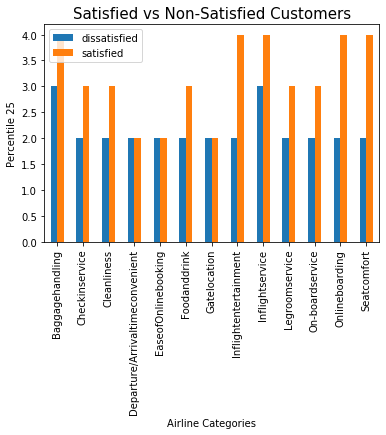

In [12]:
catdiff.plot(kind='bar',rot=90)
plt.title('Satisfied vs Non-Satisfied Customers', fontdict={'fontsize': 15})
plt.xlabel('Airline Categories')
plt.ylabel('Percentile 25')
plt.legend(['dissatisfied','satisfied'])
plt.show()

In [158]:
sns.barplot(y.catdiff.satisfaction,data=catdiff)

AttributeError: 'numpy.float64' object has no attribute 'catdiff'

In [45]:
#remove passengers under 18 - likely non-payers
df.drop(df[df.Age < 18].index, inplace=True)

In [207]:
df['Age'].value_counts().sort_index()

18    245
19    206
20    358
21    395
22    580
23    589
24    558
25    713
26    533
27    595
28    441
29    503
30    491
31    400
32    358
33    483
34    445
35    475
36    548
37    565
38    557
39    723
40    635
41    633
42    560
43    626
44    622
45    600
46    562
47    559
48    580
49    563
50    502
51    503
52    540
53    473
54    535
55    473
56    452
57    475
58    448
59    462
60    418
61    239
62    228
63    186
64    190
65    196
66    191
67    163
68    175
69    153
70    149
71     20
72     48
73     16
74     14
75     15
76     15
77     19
78     11
79     10
80     32
85      8
Name: Age, dtype: int64

In [15]:
def Percentile25(g):
    return np.percentile(g, 25)

customer = df[df.CustomerType == "Loyal Customer"].pivot_table(columns = ['satisfaction'], 
               values = [
       'Departure/Arrivaltimeconvenient', 'EaseofOnlinebooking',
       'Gatelocation', 'Foodanddrink', 'Onlineboarding', 'Seatcomfort',
       'Inflightentertainment', 'On-boardservice', 'Legroomservice',
       'Baggagehandling', 'Checkinservice', 'Inflightservice', 'Cleanliness'], 
               aggfunc = [Percentile25])
              

customer

Percentile25          
satisfaction                    neutral or dissatisfied satisfied
Baggagehandling                                       3         4
Checkinservice                                        2         3
Cleanliness                                           2         3
Departure/Arrivaltimeconvenient                       2         2
EaseofOnlinebooking                                   2         2
Foodanddrink                                          2         3
Gatelocation                                          2         2
Inflightentertainment                                 2         4
Inflightservice                                       3         4
Legroomservice                                        2         3
On-boardservice                                       2         3
Onlineboarding                                        2         4
Seatcomfort                                           2         4

In [13]:
def Percentile25(g):
    return np.percentile(g, 25)

customer2 = df[df.CustomerType == "disloyal Customer"].pivot_table(columns = ['satisfaction'], 
               values = [
       'Departure/Arrivaltimeconvenient', 'EaseofOnlinebooking',
       'Gatelocation', 'Foodanddrink', 'Onlineboarding', 'Seatcomfort',
       'Inflightentertainment', 'On-boardservice', 'Legroomservice',
       'Baggagehandling', 'Checkinservice', 'Inflightservice', 'Cleanliness'], 
               aggfunc = [Percentile25])
              

customer2

Percentile25          
satisfaction                    neutral or dissatisfied satisfied
Baggagehandling                                       3         4
Checkinservice                                        2         3
Cleanliness                                           2         2
Departure/Arrivaltimeconvenient                       1         0
EaseofOnlinebooking                                   2         4
Foodanddrink                                          2         2
Gatelocation                                          2         2
Inflightentertainment                                 2         2
Inflightservice                                       3         4
Legroomservice                                        2         2
On-boardservice                                       2         3
Onlineboarding                                        2         4
Seatcomfort                                           2         2

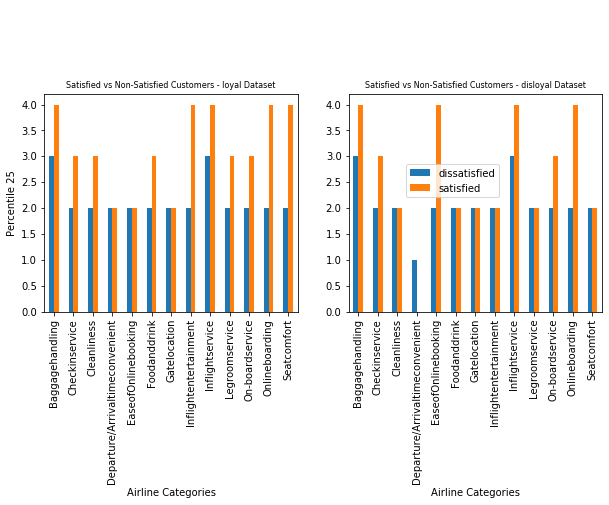

In [27]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

customer.plot(kind='bar',rot=90, legend=None,ax=ax[0])
customer2.plot(kind='bar',rot=90, legend=None,ax=ax[1])

ax[0].set_xlabel('Airline Categories')
ax[1].set_xlabel('Airline Categories')
ax[0].set_ylabel('Percentile 25')

ax[0].set_title('Satisfied vs Non-Satisfied Customers - loyal Dataset', fontdict={'fontsize': 8})
ax[1].set_title('Satisfied vs Non-Satisfied Customers - disloyal Dataset', fontdict={'fontsize': 8})

fig.legend(['dissatisfied','satisfied'],bbox_to_anchor=(0.7, 1.2))

plt.show()

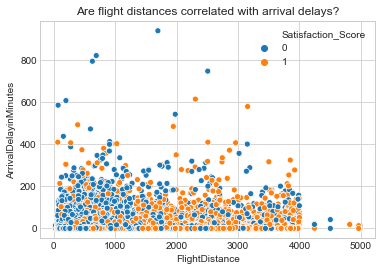

In [219]:
#all customers
sns.set_style('whitegrid')
sns.scatterplot(x='FlightDistance', y='ArrivalDelayinMinutes', data=df, hue='Satisfaction_Score')
plt.title("Are flight distances correlated with arrival delays?")
plt.show()

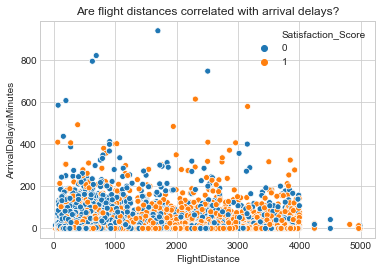

In [220]:
#loyal customers only
sns.set_style('whitegrid')
sns.scatterplot(x='FlightDistance', y='ArrivalDelayinMinutes', data=df[(df['CustomerType'] == 'Loyal Customer')], hue='Satisfaction_Score')
plt.title("Are flight distances correlated with arrival delays?")
plt.show()